## IMPORT statements

In [1]:
import sys
print(sys.version)
import numpy as np
print("Numpy version:", np.__version__)
import pandas as pd
print("Pandas version:", pd.__version__)
import matplotlib.pyplot as plt
#specific to jupyter notebook
%matplotlib inline


3.5.1 |Anaconda 2.4.1 (x86_64)| (default, Dec  7 2015, 11:24:55) 
[GCC 4.2.1 (Apple Inc. build 5577)]
Numpy version: 1.10.1
Pandas version: 0.17.1


## Read in the csv file with ALL columns for initial data analysis

All of us are keeping track of the columns we want to use for the final report, and we'll create a filtered version of the data for the final, and re-run all the code on that filtered data to confirm it works.

In [18]:
flight_data = pd.read_csv('Flight_Data_Original.csv')

//anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Drop columns not needed for data analysis

In [63]:
# Initial drop code is deleting these sections of the data:
# Diverted Airport Information (Data starts 10/2008)
# Gate Return Information at Origin Airport (Data starts 10/2008)
# Cancellations and Diversions
filtered_flight_data = flight_data.drop(['Div5TailNum', 
                                         'Div5WheelsOff',
                                         'Div5LongestGTime',
                                         'Div5TotalGTime',
                                         'Div5WheelsOn',
                                         'Div5AirportSeqID',
                                         'Div5AirportID',
                                         'Div5Airport',
                                         'Div4TailNum',
                                         'Div4WheelsOff',
                                         'Div4LongestGTime',
                                         'Div4TotalGTime',
                                         'Div4WheelsOn',
                                         'Div4AirportSeqID',
                                         'Div4AirportID',
                                         'Div4Airport',
                                         'Div3TailNum',
                                         'Div3WheelsOff',
                                         'Div3LongestGTime',
                                         'Div3TotalGTime',
                                         'Div3WheelsOn',
                                         'Div3AirportSeqID',
                                         'Div3AirportID',
                                         'Div3Airport',
                                         'Div2TailNum',
                                         'Div2WheelsOff',
                                         'Div2LongestGTime',
                                         'Div2TotalGTime',
                                         'Div2WheelsOn',
                                         'Div2AirportSeqID',
                                         'Div2AirportID',
                                         'Div2Airport',
                                         'Div1TailNum',
                                         'Div1WheelsOff',
                                         'Div1LongestGTime',
                                         'Div1TotalGTime',
                                         'Div1WheelsOn',
                                         'Div1AirportSeqID',
                                         'Div1AirportID',
                                         'Div1Airport',
                                         'DivDistance',
                                         'DivArrDelay',
                                         'DivActualElapsedTime',
                                         'DivReachedDest',
                                         'DivAirportLandings',
                                         'LongestAddGTime',
                                         'TotalAddGTime',
                                         'FirstDepTime',
                                         'Diverted',
                                         'CancellationCode',
                                         'Cancelled',
                                         'Unnamed: 109',
                                         'Quarter'],
                                        axis=1)



column_list = list(filtered_flight_data.columns)
for i in column_list:
    print(i)

Year
Quarter
Month
DayofMonth
DayOfWeek
FlightDate
UniqueCarrier
AirlineID
Carrier
TailNum
FlightNum
OriginAirportID
OriginAirportSeqID
OriginCityMarketID
Origin
OriginCityName
OriginState
OriginStateFips
OriginStateName
OriginWac
DestAirportID
DestAirportSeqID
DestCityMarketID
Dest
DestCityName
DestState
DestStateFips
DestStateName
DestWac
CRSDepTime
DepTime
DepDelay
DepDelayMinutes
DepDel15
DepartureDelayGroups
DepTimeBlk
TaxiOut
WheelsOff
WheelsOn
TaxiIn
CRSArrTime
ArrTime
ArrDelay
ArrDelayMinutes
ArrDel15
ArrivalDelayGroups
ArrTimeBlk
CRSElapsedTime
ActualElapsedTime
AirTime
Flights
Distance
DistanceGroup
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay


Set display options

In [66]:
pd.set_option("display.max_columns", 65)
# pd.reset_option("display.max_columns")
pd.get_option("display.max_columns")

65

Code for displaying data

In [118]:
# filtered_flight_data.head()
# filtered_flight_data.tail(10)
# filtered_flight_data.size
filtered_flight_data.count()
# filtered_flight_data.index

Year                    520718
Quarter                 520718
Month                   520718
DayofMonth              520718
DayOfWeek               520718
FlightDate              520718
UniqueCarrier           520718
AirlineID               520718
Carrier                 520718
TailNum                 519995
FlightNum               520718
OriginAirportID         520718
OriginAirportSeqID      520718
OriginCityMarketID      520718
Origin                  520718
OriginCityName          520718
OriginState             520718
OriginStateFips         520718
OriginStateName         520718
OriginWac               520718
DestAirportID           520718
DestAirportSeqID        520718
DestCityMarketID        520718
Dest                    520718
DestCityName            520718
DestState               520718
DestStateFips           520718
DestStateName           520718
DestWac                 520718
CRSDepTime              520718
DepTime                 516211
DepDelay                516211
DepDelay

Code from the first questions (copied from previous notebook)

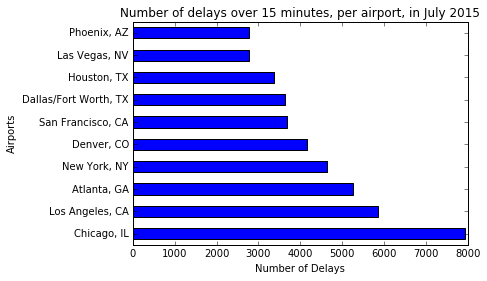

In [33]:
flight_data["ArrDel15"].groupby(flight_data["DestCityName"]) \
                                   .sum() \
                                   .sort_values(ascending = False) \
                                   .head(10) \
                                   .plot(kind = 'barh', title='Number of delays over 15 minutes, in July 2015') \
                                   .set(xlabel="Number of Delays", ylabel="Airports")


plt.savefig('graph1.png')

[<matplotlib.text.Text at 0x10b3caf60>, <matplotlib.text.Text at 0x109eb72b0>]

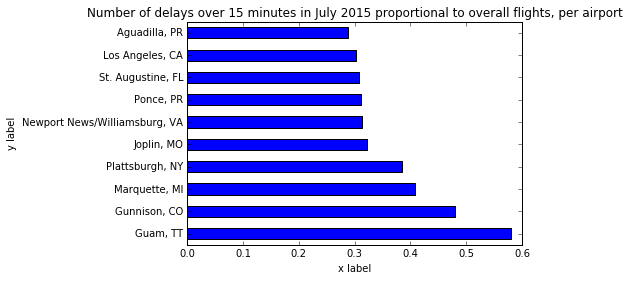

In [38]:
flight_data.ArrDel15.groupby(flight_data.DestCityName) \
                                   .sum() \
                                   .div(flight_data.DestCityName.value_counts()) \
                                   .sort_values(ascending = False) \
                                   .head(10) \
                                   .plot(kind = 'barh', title='Number of delays over 15 minutes in July 2015 proportional to '
                                         'overall flights, per airport') \
                                   .set(xlabel="x label", ylabel="y label")

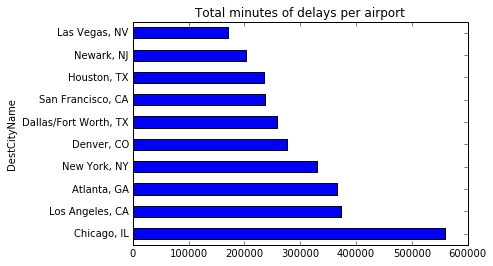

In [34]:
arr_delay = flight_data["ArrDelayMinutes"]
arr_delay.groupby(flight_data["DestCityName"]) \
                                   .sum() \
                                   .sort_values(ascending = False) \
                                   .head(10) \
                                   .plot(kind = 'barh', title='Total minutes of delays per airport') 
                
plt.savefig('graph2.png')

[<matplotlib.text.Text at 0x10a111b00>, <matplotlib.text.Text at 0x10617ee80>]

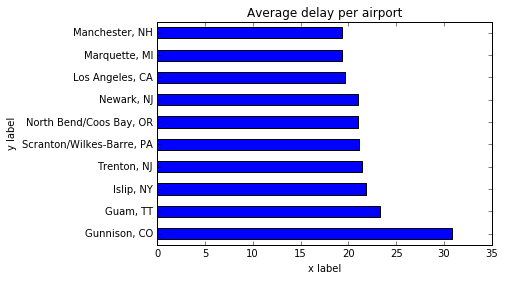

In [35]:
flight_data.ArrDelayMinutes.groupby(flight_data.DestCityName) \
                                   .mean() \
                                   .sort_values(ascending = False) \
                                   .head(10) \
                                   .plot(kind = 'barh', title='Average delay per airport') \
                                   .set(xlabel="x label", ylabel="y label")

In [35]:
flight_data.ArrDelayMinutes.groupby(flight_data.UniqueCarrier) \
                                   .mean() \
                                   .sort_values(ascending = False) \
                                   .head(10) \
                                   .plot(kind = 'barh', title='Average delay by Carrier') \
                                   .set(xlabel="x label", ylabel="y label")

[<matplotlib.text.Text at 0x105d19630>, <matplotlib.text.Text at 0x108dc7cc0>]

Code for next question: 


For the worst 20 airports by Q1 & Q2, look at the contribution by the departure:


If proportion of total delay by a specific airport is greater than a proportion of flights coming from that airport, then note that (e.g., Phoenix accounts for 25% of total 15+ min delayed flights to Las Vegas, but represents only 15% of flights to Las Vegas)


Repeat questions 1-2, but instead pivot on the departure instead of the arrival

In [45]:
# updated to reflect airport code instead of airport city
flight_data.ArrDel15.groupby(flight_data.Dest) \
                                   .sum() \
                                   .div(flight_data.Dest.value_counts()) \
                                   .sort_values(ascending = False) \
                                   .head(10) \
                                   .plot(kind = 'barh', title='Number of delays over 15 minutes in July 2015 proportional to '
                                         'overall flights, per airport') \
                                   .set(xlabel="x label", ylabel="y label")
                        

[<matplotlib.text.Text at 0x10a145550>, <matplotlib.text.Text at 0x10a8fb2e8>]

Ratio I'm trying to get at here, starting with just one of the airports (LAX) that had a large number of delays over 15 minutes:

Number of delayed flights from an origin airport into LAX (calculated with .sum method) \ all delayed flights at LAX

compared to

Number of total flights from that origin airport into LAX \ total flights into LAX

I'm not sure I'm thinking out the ratio properly here.

In [120]:
LAX = flight_data[flight_data.Dest == 'LAX']

subset_ratio = LAX.Origin.value_counts().div(len(LAX))

flight_data[flight_data.Dest == 'LAX'].groupby('Origin')['ArrDel15'] \
              .sum() \
              .div(flight_data[flight_data.Dest == 'LAX'].ArrDel15.sum()) \
              .subtract(subset_ratio) \
              .sort_values(ascending = False) \
              .head(5) \
              .plot(kind = 'barh')
                
                

Single highest delay

In [115]:
filtered_flight_data[flight_data.ArrDelay == flight_data.ArrDelay.max()]

Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate UniqueCarrier  \
22263  2015        3      7          13          1  2015-07-13            AA   

       AirlineID Carrier TailNum  FlightNum  OriginAirportID  \
22263      19805      AA  N3LEAA       1319            12339   

       OriginAirportSeqID  OriginCityMarketID Origin    OriginCityName  \
22263             1233904               32337    IND  Indianapolis, IN   

      OriginState  OriginStateFips OriginStateName  OriginWac  DestAirportID  \
22263          IN               18         Indiana         42          12892   

       DestAirportSeqID  DestCityMarketID Dest     DestCityName DestState  \
22263           1289203             32575  LAX  Los Angeles, CA        CA   

       DestStateFips DestStateName  DestWac  CRSDepTime  DepTime  DepDelay  \
22263              6    California       91        1905     2210      1625   

       DepDelayMinutes  DepDel15  DepartureDelayGroups DepTimeBlk  TaxiOut  \
22263             1625         1                    12  1900-1959       34   

       WheelsOff  WheelsOn  TaxiIn  CRSArrTime  ArrTime  ArrDelay  \
22263       2244      2342       7        2033     2349      1636   

       ArrDelayMinutes  ArrDel15  ArrivalDelayGroups ArrTimeBlk  \
22263             1636         1                  12  2000-2059   

       CRSElapsedTime  ActualElapsedTime  AirTime  Flights  Distance  \
22263             268                279      238        1      1814   

       DistanceGroup  CarrierDelay  WeatherDelay  NASDelay  SecurityDelay  \
22263              8          1625             0        11              0   

       LateAircraftDelay  
22263                  0

Earliest departure

In [116]:
filtered_flight_data[flight_data.ArrDelay == flight_data.ArrDelay.min()]

Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate UniqueCarrier  \
76729  2015        3      7           4          6  2015-07-04            AS   

       AirlineID Carrier TailNum  FlightNum  OriginAirportID  \
76729      19930      AS  N513AS          3            11278   

       OriginAirportSeqID  OriginCityMarketID Origin  OriginCityName  \
76729             1127802               30852    DCA  Washington, DC   

      OriginState  OriginStateFips OriginStateName  OriginWac  DestAirportID  \
76729          VA               51        Virginia         38          14747   

       DestAirportSeqID  DestCityMarketID Dest DestCityName DestState  \
76729           1474703             30559  SEA  Seattle, WA        WA   

       DestStateFips DestStateName  DestWac  CRSDepTime  DepTime  DepDelay  \
76729             53    Washington       93        1850     1837       -13   

       DepDelayMinutes  DepDel15  DepartureDelayGroups DepTimeBlk  TaxiOut  \
76729                0         0                    -1  1800-1859       11   

       WheelsOff  WheelsOn  TaxiIn  CRSArrTime  ArrTime  ArrDelay  \
76729       1848      2035       8        2156     2043       -73   

       ArrDelayMinutes  ArrDel15  ArrivalDelayGroups ArrTimeBlk  \
76729                0         0                  -2  2100-2159   

       CRSElapsedTime  ActualElapsedTime  AirTime  Flights  Distance  \
76729             366                306      287        1      2329   

       DistanceGroup  CarrierDelay  WeatherDelay  NASDelay  SecurityDelay  \
76729             10           NaN           NaN       NaN            NaN   

       LateAircraftDelay  
76729                NaN

Number of flights with over 10 hours delays

In [111]:
flight_data[flight_data.ArrDelay > 600]

Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate UniqueCarrier  \
2228    2015        3      7           1          3  2015-07-01            AA   
3115    2015        3      7          18          6  2015-07-18            AA   
3667    2015        3      7          25          6  2015-07-25            AA   
5485    2015        3      7           7          2  2015-07-07            AA   
5505    2015        3      7          27          1  2015-07-27            AA   
9325    2015        3      7          12          7  2015-07-12            AA   
11763   2015        3      7           3          5  2015-07-03            AA   
15000   2015        3      7           8          3  2015-07-08            AA   
16485   2015        3      7          18          6  2015-07-18            AA   
16672   2015        3      7          19          7  2015-07-19            AA   
21100   2015        3      7          13          1  2015-07-13            AA   
22263   2015        3      7          13          1  2015-07-13            AA   
28254   2015        3      7          13          1  2015-07-13            AA   
31977   2015        3      7           4          6  2015-07-04            AA   
37634   2015        3      7          31          5  2015-07-31            AA   
37754   2015        3      7          31          5  2015-07-31            AA   
38485   2015        3      7          28          2  2015-07-28            AA   
41149   2015        3      7          21          2  2015-07-21            AA   
41159   2015        3      7          31          5  2015-07-31            AA   
42633   2015        3      7          27          1  2015-07-27            AA   
42831   2015        3      7          10          5  2015-07-10            AA   
43055   2015        3      7           6          1  2015-07-06            AA   
47849   2015        3      7           9          4  2015-07-09            AA   
47991   2015        3      7          18          6  2015-07-18            AA   
73796   2015        3      7          28          2  2015-07-28            AA   
77952   2015        3      7           5          7  2015-07-05            AS   
78195   2015        3      7           5          7  2015-07-05            AS   
81274   2015        3      7          16          4  2015-07-16            AS   
86640   2015        3      7          28          2  2015-07-28            AS   
90466   2015        3      7           7          2  2015-07-07            AS   
...      ...      ...    ...         ...        ...         ...           ...   
385181  2015        3      7           9          4  2015-07-09            UA   
390936  2015        3      7           7          2  2015-07-07            DL   
407145  2015        3      7          13          1  2015-07-13            DL   
417297  2015        3      7          16          4  2015-07-16            DL   
418084  2015        3      7          16          4  2015-07-16            DL   
418279  2015        3      7          16          4  2015-07-16            DL   
423024  2015        3      7          19          7  2015-07-19            DL   
426635  2015        3      7          18          6  2015-07-18            DL   
431417  2015        3      7          21          2  2015-07-21            DL   
431424  2015        3      7          21          2  2015-07-21            DL   
432138  2015        3      7          22          3  2015-07-22            DL   
433965  2015        3      7          17          5  2015-07-17            DL   
434974  2015        3      7          17          5  2015-07-17            DL   
443786  2015        3      7          26          7  2015-07-26            DL   
444830  2015        3      7          27          1  2015-07-27            DL   
455220  2015        3      7          29          3  2015-07-29            DL   
455368  2015        3      7          29          3  2015-07-29            DL   
456151  2015        3      7          3